# Author: Ashmita Mukherjee

# Data Science Internship @Encryptix

## Task: Sales Predictions

### Batch: July, 2024

### import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the data

In [3]:
sample = pd.read_csv('advertising.csv')
sample.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### data exploration

In [4]:
sample.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


highest expenses in on TV and lowest is on radios

In [5]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#check for null values
sample.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
#check for duplicate values
sample.duplicated().sum()

0

### data visualization

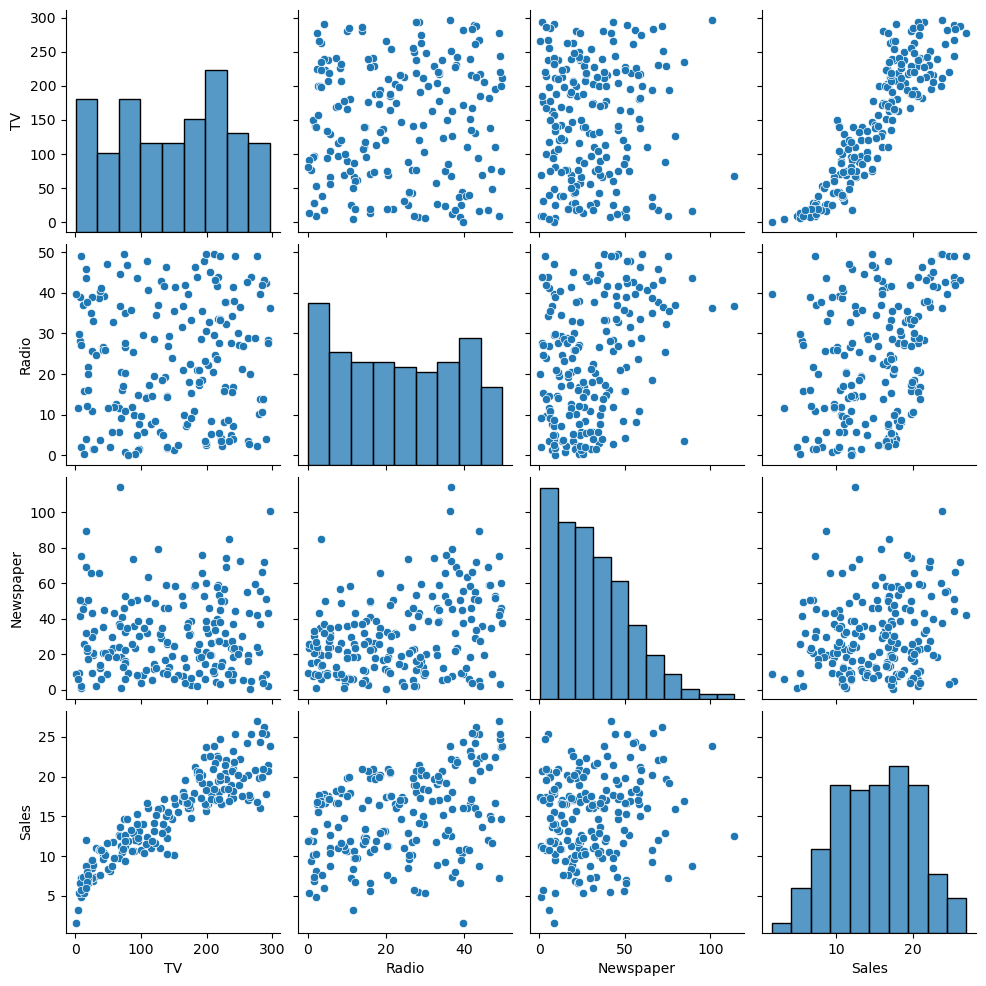

In [8]:
sns.pairplot(sample)

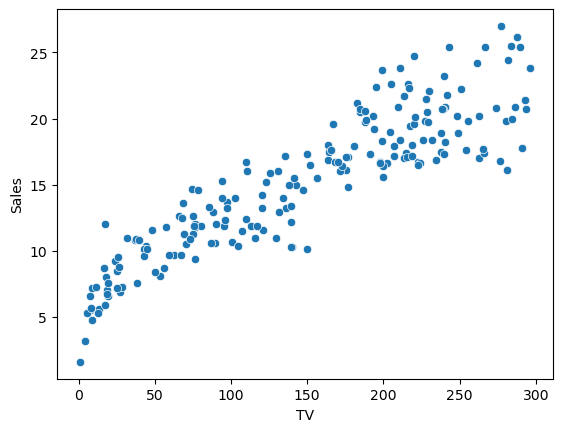

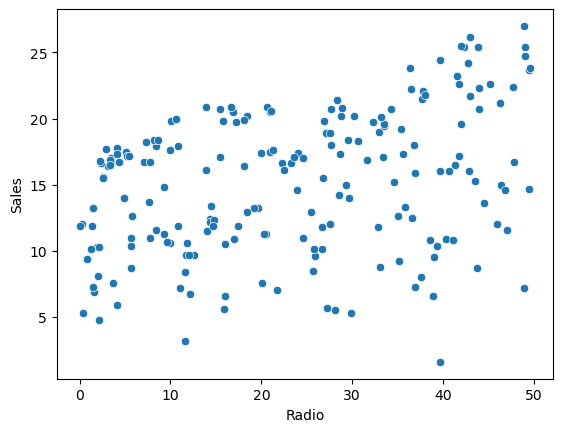

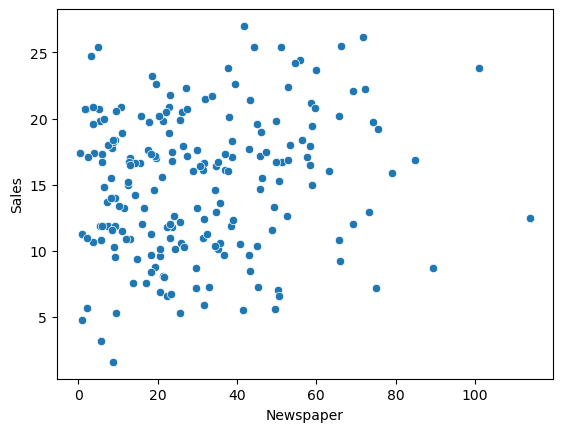

In [9]:
for x_var in ['TV', 'Radio', 'Newspaper']:
    sns.scatterplot(x=x_var, y='Sales', data=sample)
    plt.show()

as advertisement cost increases in tv ads sales also increases but for newspaper or radio, sales is unpredictable

In [10]:
sample.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


there is high positive correlation between tv and sales

<Axes: >

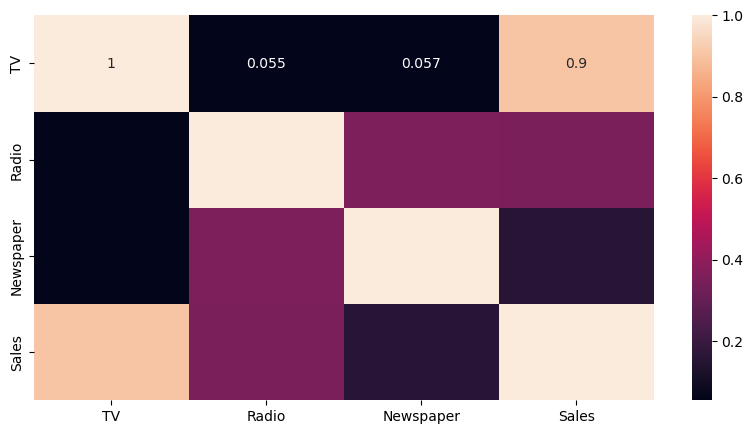

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(sample.corr(), annot=True)

### model training

In [12]:
from sklearn.model_selection import train_test_split
#train=70, #test= 30
x= sample.drop(columns= ['Sales'])
y= sample['Sales']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30)

### linear regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()

In [14]:
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
print('Accuracy:', lr.score(x_test,y_test)*100)

Accuracy: 86.4991241559044


accuracy is approximately 88%

In [16]:
y_pred = lr.predict(x_test)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.6574262686957155
R-squared: 0.8649912415590439


### using the existing information to predict the sales

In [17]:
new_data = pd.DataFrame({
    'TV': [10],#$10 on tv
    'Radio': [20],#$20 on radio
    'Newspaper': [5] #$5 on newspaper
})

#this new data should have same training as previous one 
new_data = pd.get_dummies(new_data, drop_first= True)

#making predictions
new_predictions= lr.predict(new_data)
print(f'Predicted sales: {new_predictions}')
    

Predicted sales: [7.62059576]


it is predicted that sales will be approximately 7.6 units